In [30]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import pymongo
from pymongo import MongoClient

In [31]:
client = MongoClient(conn_string)
db = client.test
db = client["Git-Repos"]
collection = db['repos-count-1000']

In [32]:
cursor = collection.find()

In [33]:
documents = []
for document in cursor:
    documents.append(document)

In [45]:
df = pd.DataFrame(documents)

In [46]:
df = df[['id','full_name','owner','forks','language','has_downloads','open_issues_count','has_discussions','size','watchers','topics']]

<Axes: title={'center': 'Top Used Programming languages'}, xlabel='Language', ylabel='Count'>

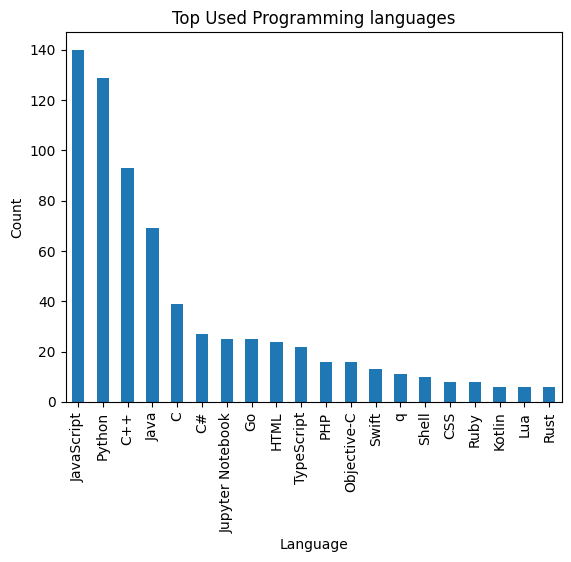

In [47]:
df['language'].value_counts().sort_values(ascending=False)[:20].plot(kind='bar', title='Top Used Programming languages', xlabel='Language', ylabel='Count')

<Axes: title={'center': 'Languages Percentage Contribution'}, xlabel='Language', ylabel='Percentage'>

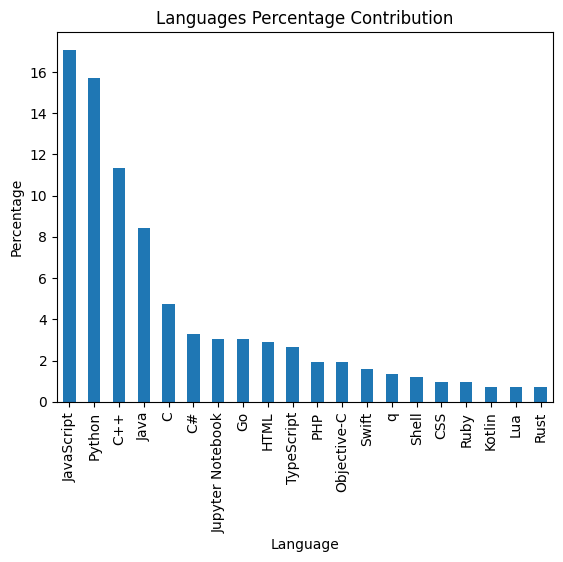

In [48]:
def get_percentage(row):
    return row / df.shape[0] * 100

count = df['language'].value_counts()
count.apply(get_percentage).sort_values(ascending=False)[:20].plot(kind='bar', title='Languages Percentage Contribution', xlabel='Language', ylabel='Percentage')

<Axes: title={'center': 'Top 10 languages of most downloaded'}, xlabel='Language', ylabel='Count'>

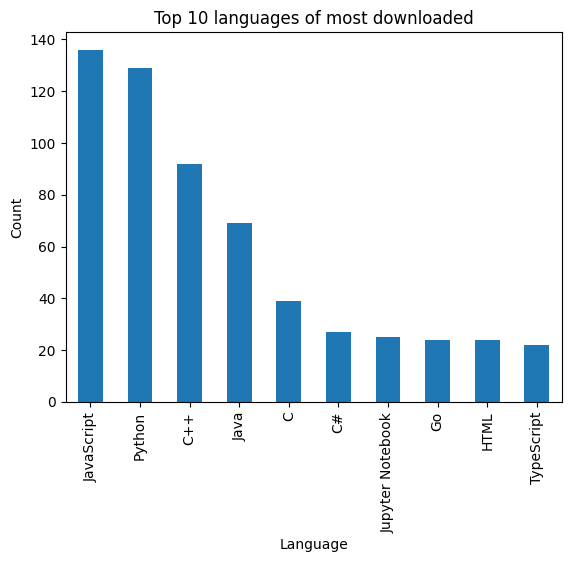

In [49]:
df[df['has_downloads'] == True]['language'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar', title='Top 10 languages of most downloaded', xlabel='Language', ylabel='Count')

<Axes: title={'center': 'Top 10 languages with most open issues'}, xlabel='Language', ylabel='Count'>

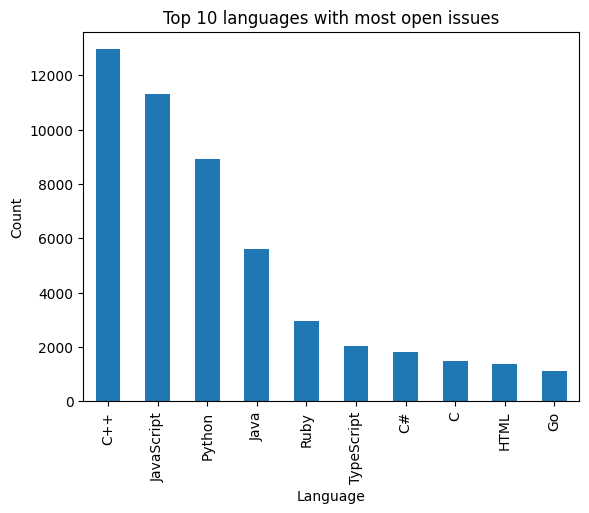

In [50]:
df.groupby('language')['open_issues_count'].sum().sort_values(ascending=False)[:10].plot(kind='bar', title='Top 10 languages with most open issues', xlabel='Language', ylabel='Count')

<Axes: title={'center': 'Top 10 languages with most open discussions'}, xlabel='Language', ylabel='Count'>

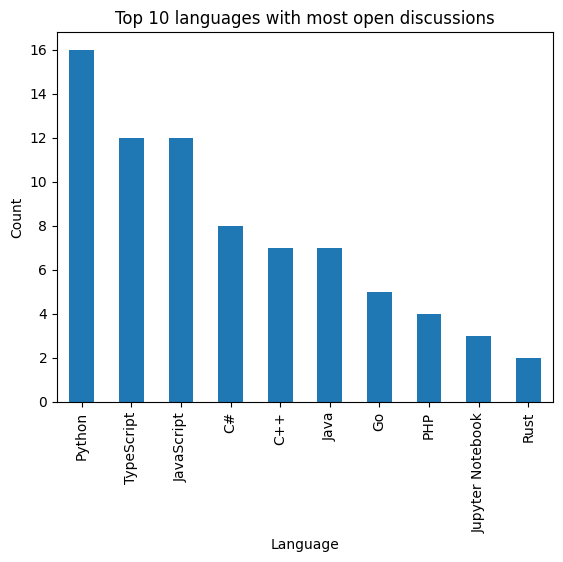

In [51]:
df[df['has_discussions'] == True]['language'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar', title='Top 10 languages with most open discussions', xlabel='Language', ylabel='Count')

<Axes: title={'center': 'Forks by language'}, xlabel='Language', ylabel='Count'>

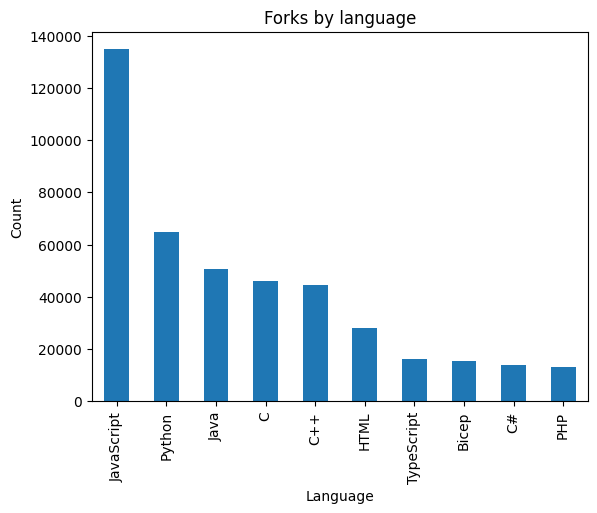

In [52]:
df.groupby('language')['forks'].sum().sort_values(ascending=False)[:10].plot(kind='bar', title='Forks by language', xlabel='Language', ylabel='Count')

<Axes: title={'center': 'Top 10 languages with highest avg size'}, xlabel='Language', ylabel='Count'>

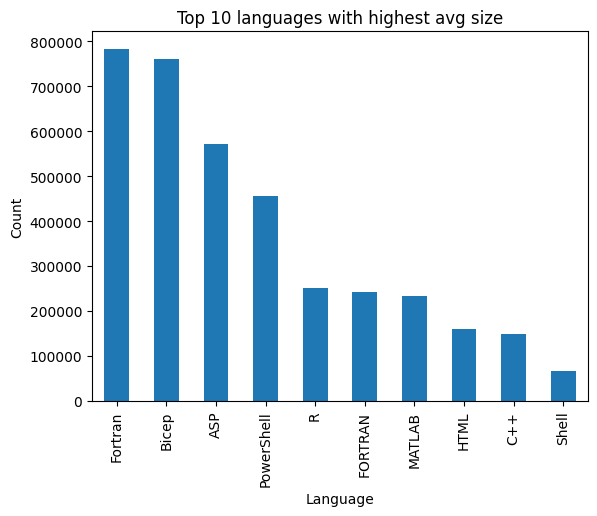

In [53]:
df.groupby('language')['size'].mean().sort_values(ascending=False)[:10].plot(kind='bar', title='Top 10 languages with highest avg size', xlabel='Language', ylabel='Count') 

<Axes: title={'center': 'Top 10 languages with highest watchers'}, xlabel='Language', ylabel='Count'>

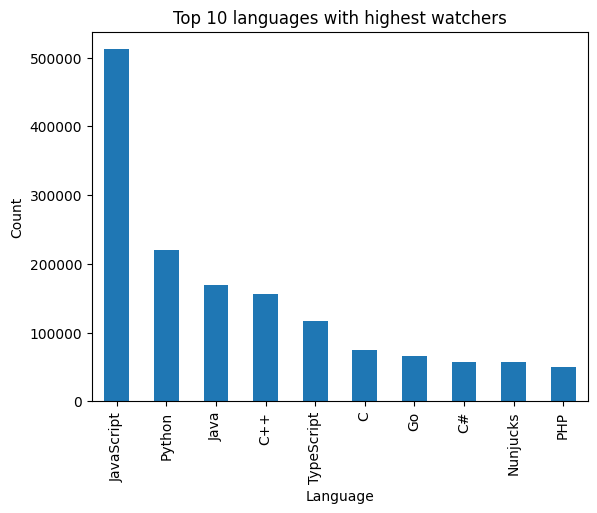

In [54]:
df.groupby('language')['watchers'].sum().sort_values(ascending=False)[:10].plot(kind='bar', title='Top 10 languages with highest watchers', xlabel='Language', ylabel='Count')

<Axes: title={'center': 'Top users with most repos'}, xlabel='User', ylabel='Count'>

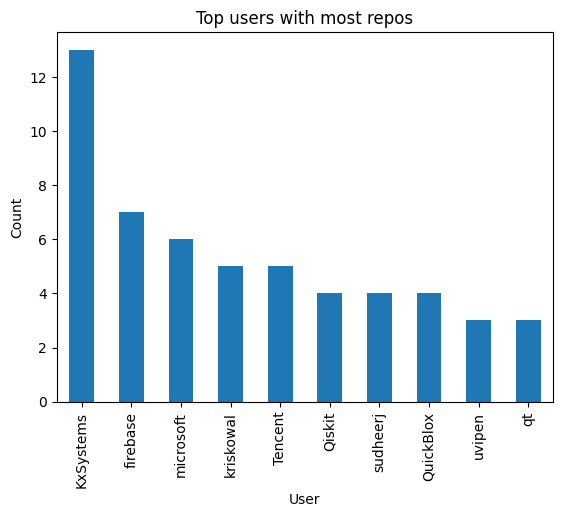

In [55]:
def get_owner(row):
    return row['login']

df['owner_name'] = df['owner'].apply(get_owner)

df['owner_name'].value_counts()[:10].plot(kind='bar', title='Top users with most repos', xlabel='User', ylabel='Count')

<Axes: title={'center': 'Top users with most used languages'}, xlabel='User', ylabel='Count'>

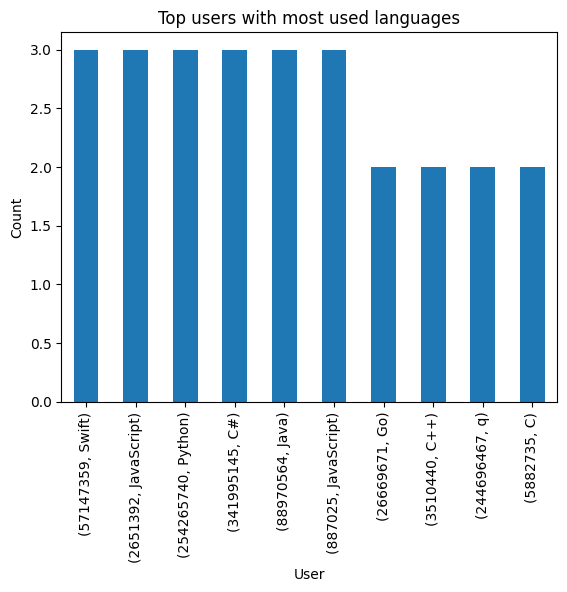

In [56]:
df.groupby('id')['language'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar', title='Top users with most used languages', xlabel='User', ylabel='Count')

In [57]:
df.groupby('owner_name')['language'].nunique().sort_values(ascending=False).mean()

0.9448275862068966

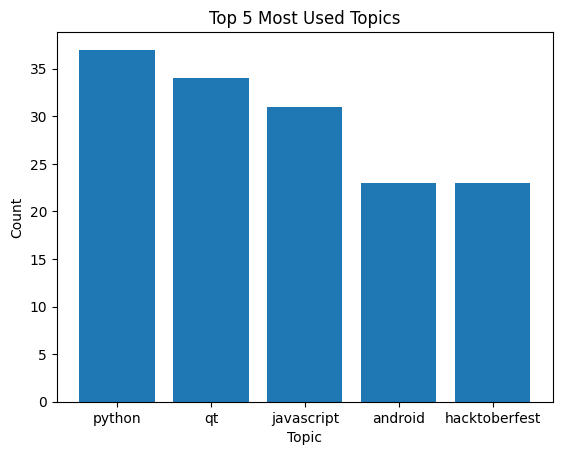

In [58]:
topics = []

def get_topics(row):
  topics.extend(row)
  return

x = df['topics'].apply(get_topics)

topic_counts = Counter(topics)
top10topics = topic_counts.most_common(5)

labels, values = zip(*top10topics)

plt.bar(labels, values)
plt.title('Top 5 Most Used Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()